In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Mall_Customers.csv')
df.head(
)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

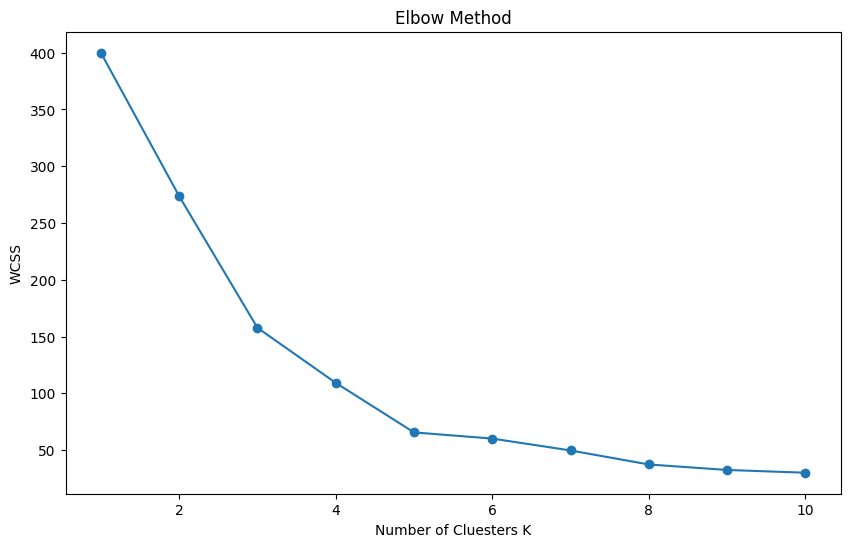

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Cluesters K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))


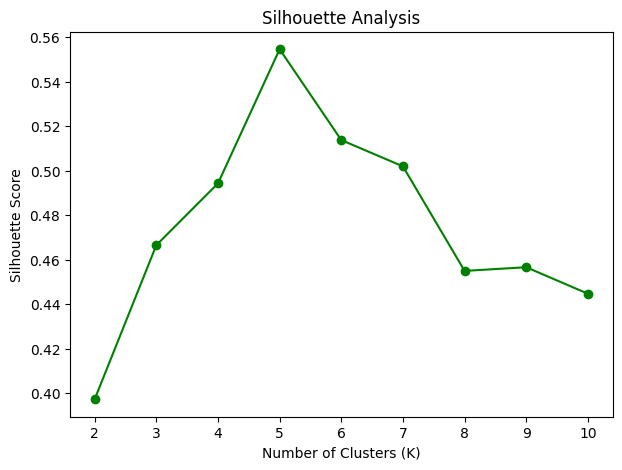

In [15]:
plt.figure(figsize=(7,5))
plt.plot(range(2,11), silhouette_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


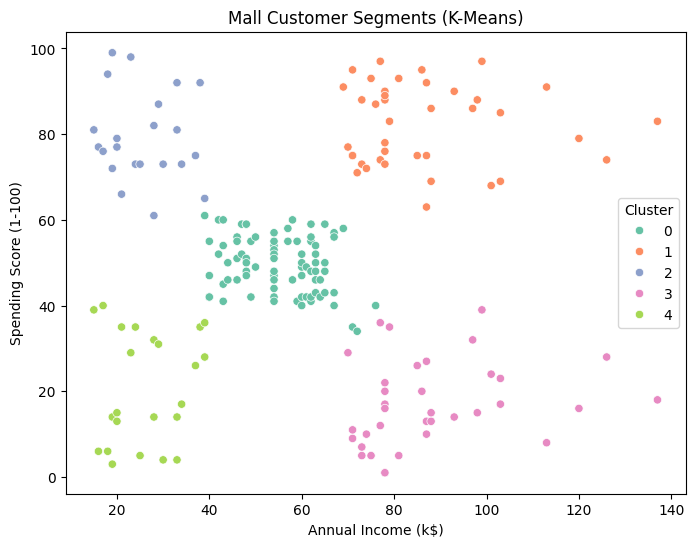

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title("Mall Customer Segments (K-Means)")
plt.show()


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']


In [19]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()


(array([0.50495142, 0.49504858]), np.float64(1.0))

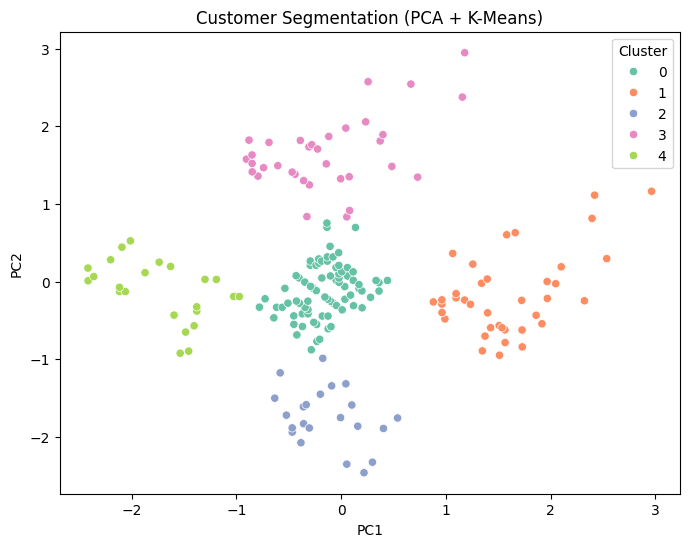

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_df,
    palette='Set2'
)
plt.title("Customer Segmentation (PCA + K-Means)")
plt.show()


In [21]:
cluster_profile = df.groupby('Cluster')[[
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()

cluster_profile


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043
